### Import Library

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import pickle

### Collect Dataset

In [ ]:
fileLocation = '../Source/exercise-Kaggle-SampleSOLN.csv'
df = pd.read_csv(fileLocation)

In [ ]:
fileLocation = '../Source/exercise-test.csv'
df_test = pd.read_csv(fileLocation)

In [ ]:
df.head()

,id,Calories
0,10001,88.5
1,10002,88.5
2,10003,88.5
3,10004,88.5
4,10005,88.5


In [ ]:
df.shape

(4000, 2)

In [ ]:
df_test.head()

,id,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,10001,female,66,171,65,28,96,40.6
1,10002,female,63,182,85,6,91,39.4
2,10003,female,48,175,75,11,92,40.0
3,10004,male,35,190,87,14,91,39.9
4,10005,female,49,148,54,29,101,40.8


In [ ]:
df_test.shape

(4000, 8)

In [ ]:
x_userid = df['id'].tolist()
y_userid = df_test['id'].tolist()

In [ ]:
print(x_userid[0:10])

[10001, 10002, 10003, 10004, 10005, 10006, 10007, 10008, 10009, 10010]


In [ ]:
print(y_userid[0:10])

[10001, 10002, 10003, 10004, 10005, 10006, 10007, 10008, 10009, 10010]


### Checking User ID's In Both Tables

In [ ]:
missing_id = 0
avl_id = 0

for i in x_userid:
  if i in y_userid:
    avl_id += 1

  else:
    missing_id += 1


print(missing_id)
print(avl_id)

0
4000


### Join Tables

In [ ]:
df_new = df.join(df_test, on=None, how='inner', lsuffix='id', rsuffix='id', sort=False)

In [ ]:
df_new.head()

,idid,Calories,idid,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,10001,88.5,10001,female,66,171,65,28,96,40.6
1,10002,88.5,10002,female,63,182,85,6,91,39.4
2,10003,88.5,10003,female,48,175,75,11,92,40.0
3,10004,88.5,10004,male,35,190,87,14,91,39.9
4,10005,88.5,10005,female,49,148,54,29,101,40.8


In [ ]:
df_new.drop(['idid'],axis=1,inplace=True)

In [ ]:
df_new.head()

,Calories,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,88.5,female,66,171,65,28,96,40.6
1,88.5,female,63,182,85,6,91,39.4
2,88.5,female,48,175,75,11,92,40.0
3,88.5,male,35,190,87,14,91,39.9
4,88.5,female,49,148,54,29,101,40.8


In [ ]:
df_new.shape

(4000, 8)

In [ ]:
df_new.dtypes

Calories      float64
Gender         object
Age             int64
Height          int64
Weight          int64
Duration        int64
Heart_Rate      int64
Body_Temp     float64
dtype: object

In [ ]:
df_new.isnull().sum()

Calories      0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
dtype: int64

In [ ]:
df_new.describe().T

,count,mean,std,min,25%,50%,75%,max
Calories,4000.0,88.500000,0.000000,88.5,88.5,88.5,88.5,88.5
Age,4000.0,42.579250,16.866916,20.0,28.0,39.0,56.0,79.0
Height,4000.0,174.908000,14.297102,127.0,164.0,175.0,185.0,219.0
Weight,4000.0,75.394500,15.082431,38.0,63.0,75.0,87.0,132.0
Duration,4000.0,15.406000,8.273166,1.0,8.0,15.0,23.0,30.0
Heart_Rate,4000.0,95.320000,9.573689,68.0,88.0,96.0,103.0,121.0
Body_Temp,4000.0,40.020025,0.774330,37.3,39.6,40.2,40.6,41.5


### Data Distribution

In [ ]:
df_new['Gender'].value_counts()

male      2050
female    1950
Name: Gender, dtype: int64

C:\Users\annis\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


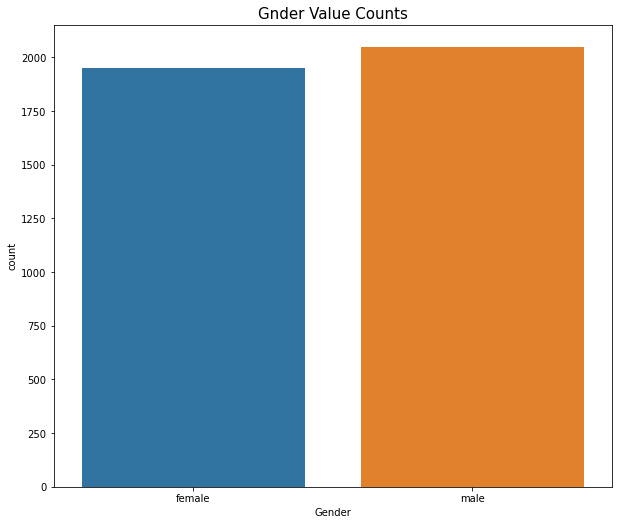

In [ ]:
plt.figure(figsize=(10,8.5))
sns.countplot(df_new['Gender'])
plt.title("Gnder Value Counts",size=15)
plt.show()

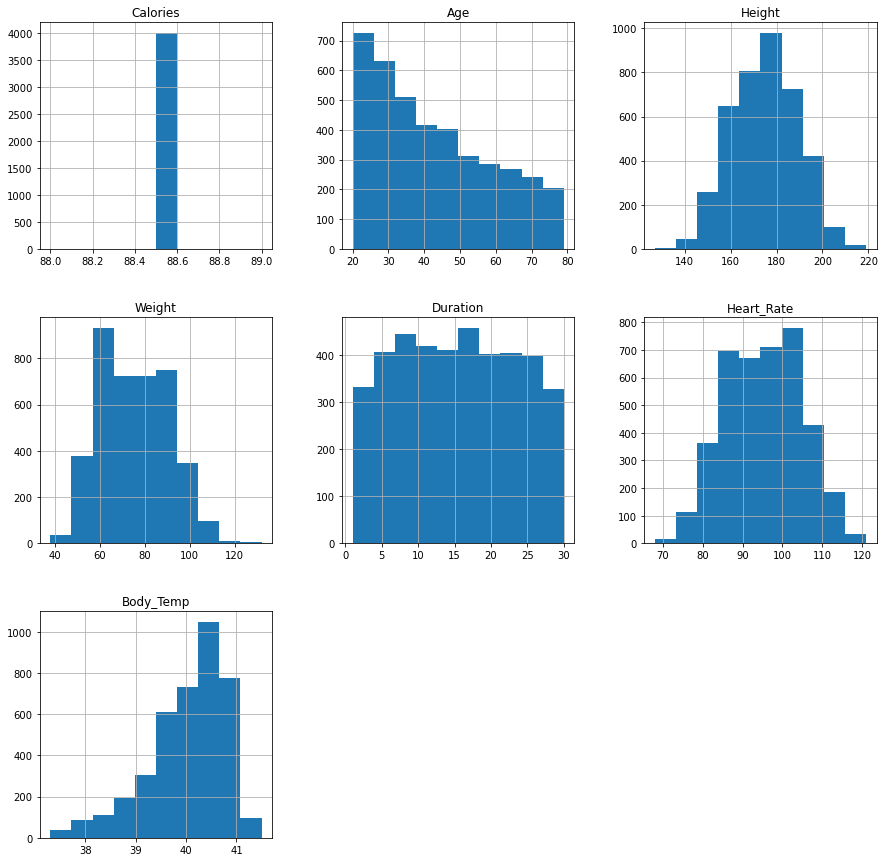

In [ ]:
df_new.hist(figsize=(15,15))
plt.show()

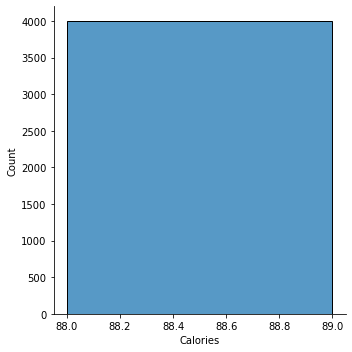

In [ ]:
sns.displot(df_new['Calories'])

### Outlier Ditection

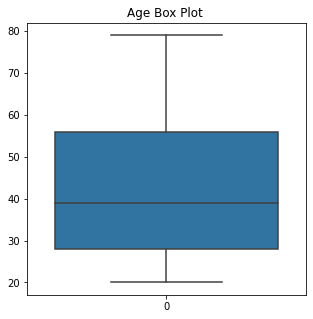

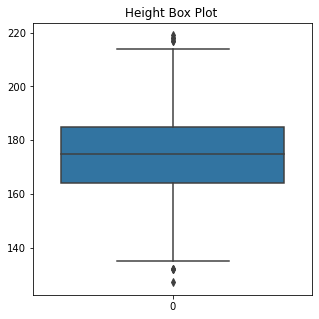

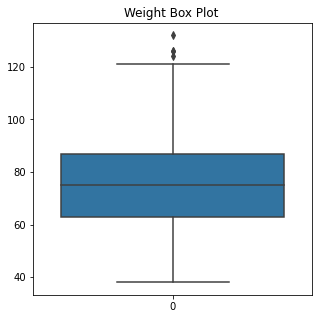

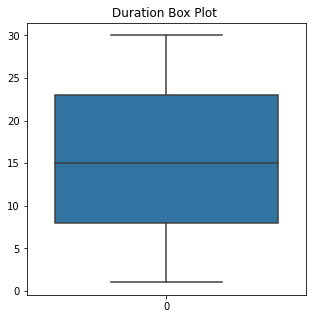

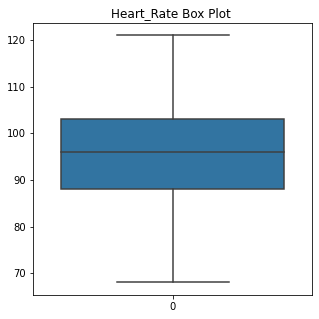

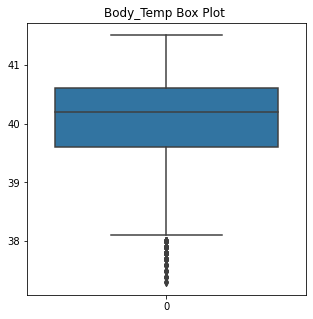

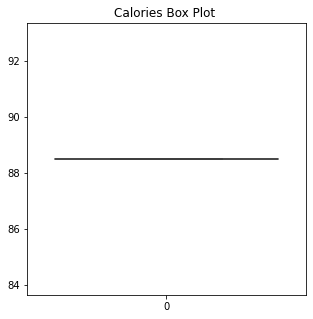

In [ ]:
def outliers_check(column):

  title = str(column) + " Box Plot "
  plt.subplots(figsize=(5,5))
  sns.boxplot(data=df_new[str(i)]).set_title(title)
  plt.show()


for i in df_new[['Age',	'Height',	'Weight',	'Duration',	'Heart_Rate', 'Body_Temp',	'Calories']].columns:

    outliers_check(i)

### Outliers In Detailed

In [ ]:
df_new[(df_new['Height'] < 130.0) | (df_new['Height'] > 215.0)  ]

,Calories,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
88,88.5,male,21,219,126,15,97,40.4
1066,88.5,male,51,217,118,4,85,39.1
1302,88.5,male,40,218,132,1,88,37.8
1850,88.5,male,55,217,126,17,91,40.4
2333,88.5,male,41,218,119,18,85,40.2
2381,88.5,female,58,127,40,29,102,40.8


In [ ]:
df_new[df_new['Weight'] > 130.0]

,Calories,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
1302,88.5,male,40,218,132,1,88,37.8


In [ ]:
df_new[df_new['Calories'] > 85.0]

,Calories,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,88.5,female,66,171,65,28,96,40.6
1,88.5,female,63,182,85,6,91,39.4
2,88.5,female,48,175,75,11,92,40.0
3,88.5,male,35,190,87,14,91,39.9
4,88.5,female,49,148,54,29,101,40.8
...,...,...,...,...,...,...,...,...
3995,88.5,female,27,170,66,24,103,40.8
3996,88.5,male,26,193,87,5,87,39.2
3997,88.5,female,22,147,49,27,105,40.7
3998,88.5,female,59,160,63,13,91,39.8


### Data Distribution

In [ ]:
df_new['Gender'].value_counts()

male      2050
female    1950
Name: Gender, dtype: int64

C:\Users\annis\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


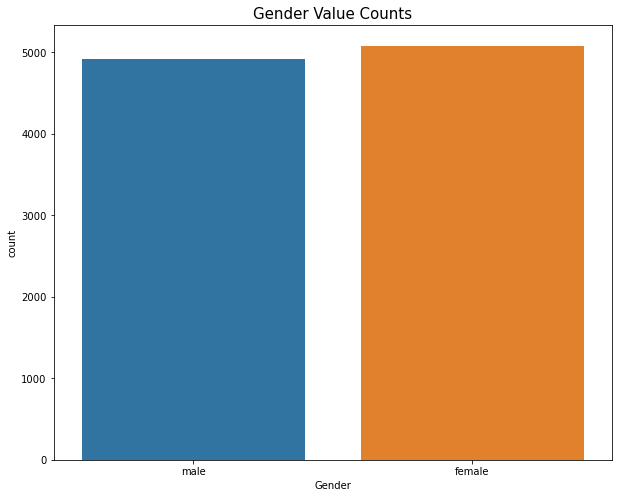

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(df_train['Gender'])
plt.title("Gender Value Counts",size=15)
plt.show()

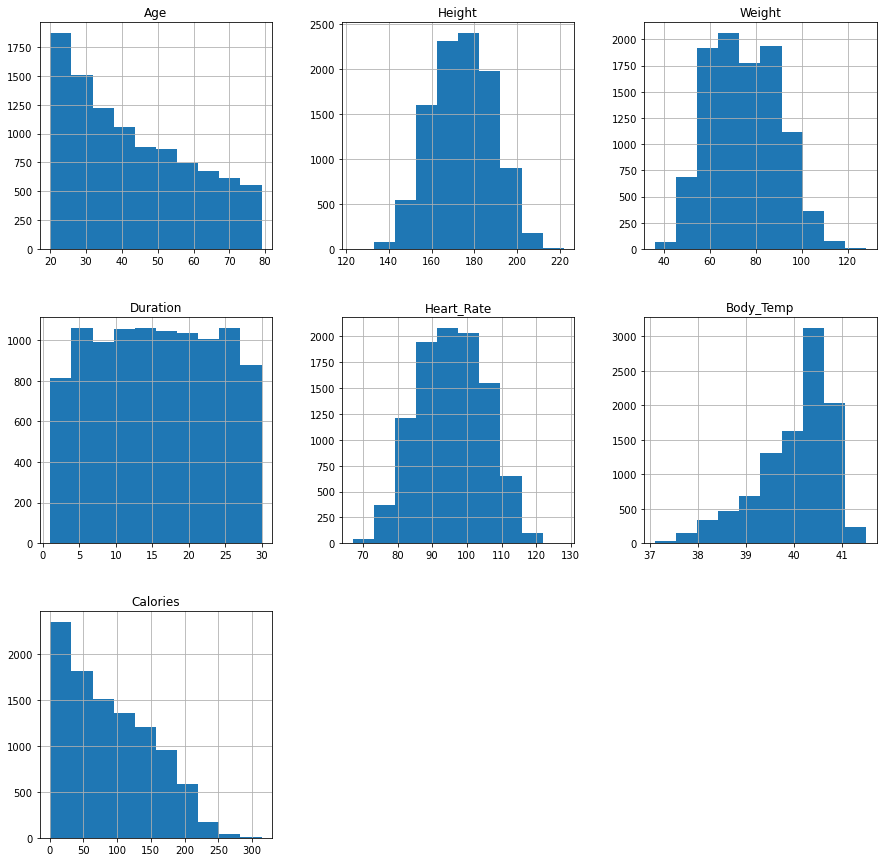

In [ ]:
df_train.hist(figsize=(15,15))
plt.show()

C:\Users\annis\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Calories', ylabel='Density'>

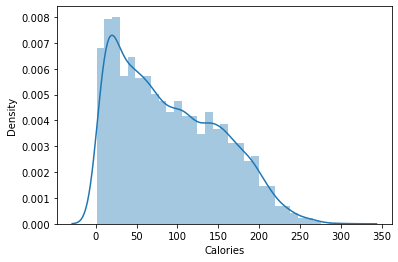

In [ ]:
sns.distplot(df_train['Calories'])

### Outlier Ditection

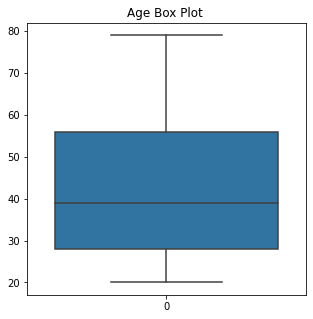

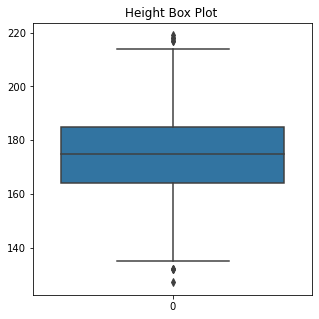

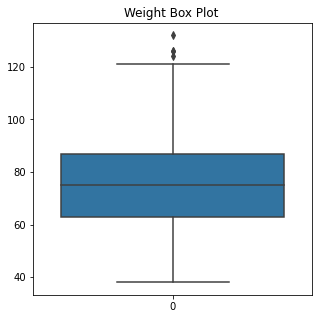

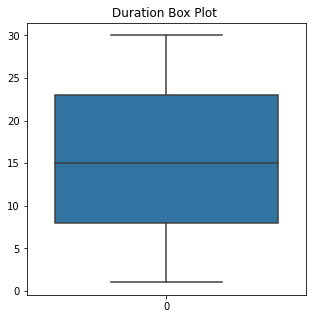

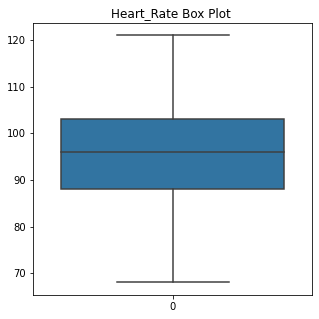

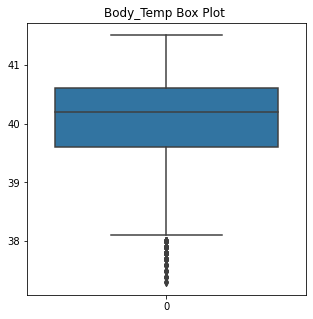

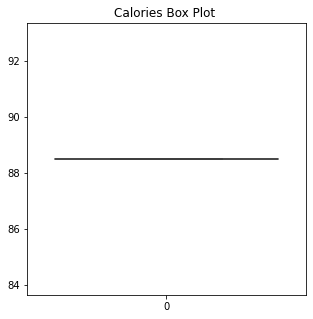

In [ ]:
def outliers_check(column):

  title = str(column) + " Box Plot "
  plt.subplots(figsize=(5,5))
  sns.boxplot(data=df_new[str(i)]).set_title(title)
  plt.show()


for i in df_new[['Age',	'Height',	'Weight',	'Duration',	'Heart_Rate', 'Body_Temp',	'Calories']].columns:

    outliers_check(i)

### Outliers In Detailed

In [ ]:
df_train[(df_train['Height'] < 130.0) | (df_train['Height'] > 215.0)  ]

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
334,female,63,123,40,9,97,39.9,55
786,female,30,126,39,25,104,40.7,156
4055,male,22,222,128,6,84,39.3,20


In [ ]:
df_train[df_train['Weight'] > 120.0]

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
850,male,67,212,124,16,87,40.1,94
1699,male,71,210,121,6,94,39.1,42
3878,male,57,210,122,5,80,39.2,21
4055,male,22,222,128,6,84,39.3,20
5313,male,71,210,121,25,111,40.6,240
5416,male,39,208,121,6,77,39.2,18
6458,male,74,212,123,25,103,40.8,215


In [ ]:
df_train[df_train['Calories'] > 300.0]

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
209,male,75,199,103,28,123,40.5,314


In [ ]:
df_train[df_train['Heart_Rate'] > 125.0]

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
6274,male,32,188,91,30,128,40.9,289


In [ ]:
df_train[df_train['Body_Temp'] < 38.1]

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
12,male,25,186,90,1,84,37.9,3
26,male,27,184,92,2,85,37.9,6
80,female,43,179,77,2,83,37.9,7
116,male,22,183,84,1,76,37.8,1
189,male,46,176,76,2,81,38.0,6
...,...,...,...,...,...,...,...,...
9916,male,37,197,92,1,87,37.5,4
9935,male,32,197,101,1,84,37.7,3
9954,female,61,153,52,2,81,37.9,8
9964,male,24,178,77,1,76,38.0,1


In [ ]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

df_train['Gender'] = label.fit_transform(df_train['Gender'])
df_train.head(10)

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,1,58,187,87,23,111,40.8,190
1,1,39,165,69,30,108,41.0,195
2,0,60,152,54,3,86,38.5,14
3,1,22,188,80,11,86,40.1,28
4,1,41,178,87,15,83,40.3,48
5,0,37,161,60,26,99,41.1,144
6,1,23,196,90,14,93,40.3,55
7,0,28,159,55,24,106,41.0,149
8,0,24,168,60,3,89,38.8,13
9,0,49,164,66,23,101,40.5,135


### Correlation Between Attributes

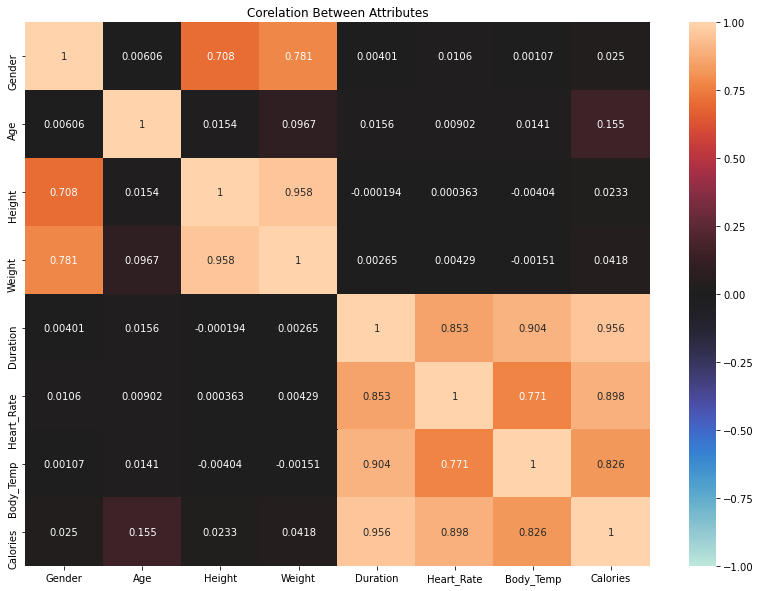

In [ ]:
plt.subplots(figsize = (14,10))
sns.heatmap(df_train.corr(),
            annot=True,fmt='.3g', vmin=-1, vmax=1, center= 0).set_title("Corelation Between Attributes")
plt.show()

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


vif_x = df_train[['Gender', 'Age',	'Height',	'Weight',	'Duration',	'Heart_Rate',	'Body_Temp']]
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = vif_x .columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(vif_x.values, i)
                          for i in range(len(vif_x.columns))]

vif_data

,feature,VIF
0,Gender,5.498604
1,Age,8.197744
2,Height,2030.418552
3,Weight,462.636276
4,Duration,14.028806
5,Heart_Rate,362.025749
6,Body_Temp,1066.151257


### Gender vs Height

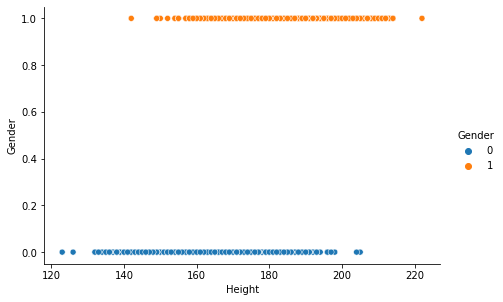

In [ ]:
pl=sns.relplot(x='Height',y='Gender',data=df_train,hue='Gender')
pl.fig.set_size_inches(7,4)
plt.show()

### Gender vs Weight

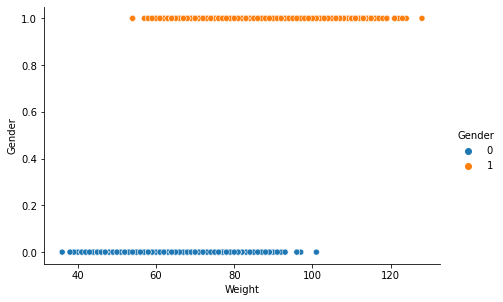

In [ ]:
pl=sns.relplot(x='Weight',y='Gender',data=df_train,hue='Gender')
pl.fig.set_size_inches(7,4)
plt.show()

### Gender vs Weight vs Height

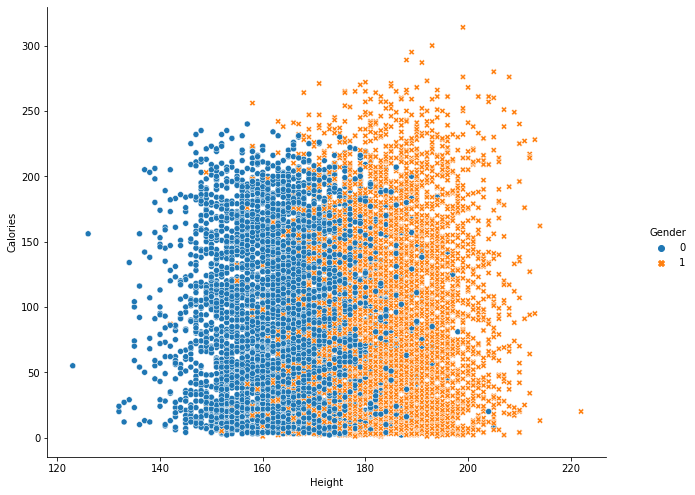

In [ ]:
pl=sns.relplot(x='Height',y='Calories',data=df_train,hue='Gender',style='Gender')
pl.fig.set_size_inches(10,7)
plt.show()

### Weight vs Calories vs Gender

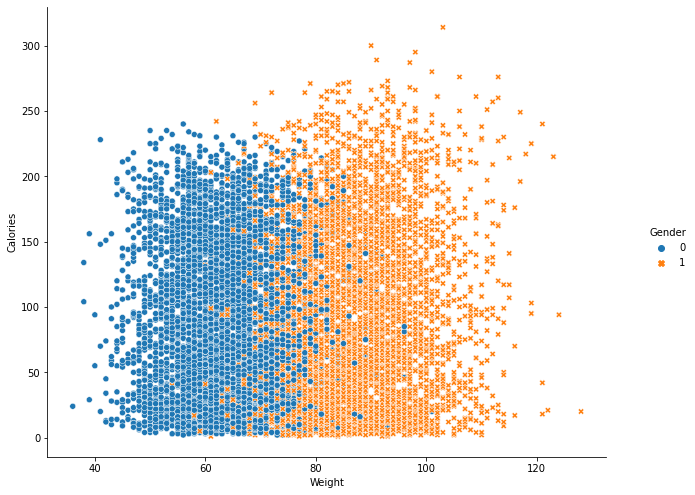

In [ ]:
pl=sns.relplot(x='Weight',y='Calories',data=df_train,hue='Gender',style='Gender')
pl.fig.set_size_inches(10,7)
plt.show()

### Oulier Handling

In [ ]:
df_ot_hnd = pd.DataFrame(df_train[~((df_train['Height'] < 130.0) | (df_train['Height'] > 215.0))])

In [ ]:
df_ot_hnd.shape

(9997, 8)

In [ ]:
df_ot_hnd = pd.DataFrame(df_ot_hnd[~(df_ot_hnd['Calories'] > 300.0)])

In [ ]:
df_ot_hnd.shape

(9996, 8)

In [ ]:
df_ot_hnd = pd.DataFrame(df_ot_hnd[~(df_ot_hnd['Heart_Rate'] > 125.0)])

In [ ]:
df_ot_hnd.shape

(9995, 8)

In [ ]:
df_ot_hnd = pd.DataFrame(df_ot_hnd[~(df_ot_hnd['Calories'] > 220.0)])
df_ot_hnd.shape

(9780, 8)

### Outliers Handaled Dataset

In [ ]:
df_ot_hnd.head()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,1,58,187,87,23,111,40.8,190
1,1,39,165,69,30,108,41.0,195
2,0,60,152,54,3,86,38.5,14
3,1,22,188,80,11,86,40.1,28
4,1,41,178,87,15,83,40.3,48


In [ ]:
df_ot_hnd.describe().T

,count,mean,std,min,25%,50%,75%,max
Gender,9780.0,0.483742,0.499761,0.0,0.0,0.0,1.0,1.0
Age,9780.0,42.461554,16.916808,20.0,28.0,39.0,55.0,79.0
Height,9780.0,174.160020,14.163547,132.0,164.0,174.0,185.0,214.0
Weight,9780.0,74.609816,14.897328,36.0,63.0,74.0,86.0,124.0
Duration,9780.0,15.292331,8.201766,1.0,8.0,15.0,22.0,30.0
Heart_Rate,9780.0,95.243661,9.335332,67.0,88.0,95.0,102.0,121.0
Body_Temp,9780.0,40.007025,0.779621,37.1,39.6,40.2,40.6,41.5
Calories,9780.0,86.698978,59.163841,1.0,34.0,77.0,134.0,220.0
